# Homework 1 Code

In [1]:
# Add import statements here
import numpy as np
import matplotlib.pyplot as plt

## Perceptron Learning

The `perceptron_learn` function runs the Perceptron Learning Algorithm on input data.

Inputs: 
* `data_in` is a matrix with each row representing an $(x, y)$ pair; the $x$ vector is augmented with a leading 1, the label, $y$, is in the last column. 
Outputs:
The function outputs a tuple, `(w, iterations)`, where: 
* `w` is the learned weight vector; it should linearly separate the data if it is linearly separable.
* `iterations` is the number of iterations the algorithm ran for. 

In [2]:
def perceptron_learn(data_in):

  # Your code here, assign the proper values to w and iterations: 
    N = data_in.shape[1]
    d = data_in.shape[0] - 2 
    w = np.zeros(d+1)
    y_true = data_in[d+1, :]
    y_pred = np.zeros(N)
    iterations = 0

    while (y_true == y_pred).all() == False:
        iterations += 1
        misclassified = (y_true != y_pred)
        indices = [i for i,val in enumerate(misclassified) if val]  # a list of misclassified indices
        index = np.random.choice(indices)  # randomly pick a misclassified index 
        x = data_in[0:d+1, index:index+1].flatten()    # get x[index]
        w += np.dot(y_true[index], x)  # update the weight
        for i in range(0, N):
            y_pred[i] = np.sign(np.dot(np.reshape(w, (1,d+1)), data_in[0:d+1, i:i+1]))  # update y_pred

    return w, iterations

# Perceptron Experiment
Code for running the perceptron experiment in HW1. 

Inputs: 
* `N` is the number of training examples
* `d` is the dimensionality of each example (before adding the 1)
* `num_samples` is the number of times to repeat the experiment

Outputs:
* `num_iters` is the number of iterations the Perceptron Learning Algorithm takes for each sample
* `bound_minus_ni` is the difference between the theoretical bound and the actual number of iterations

Both outputs should be `num_samples` long.

In [3]:
def perceptron_experiment(N, d, num_samples):

  # Your code here, assign the values to num_ters and bounds_minus_ni:
    row = d+1
    num_iters, bounds_minus_ni = np.zeros(num_samples), np.zeros(num_samples)
    
    for experiment_count in range(0, num_samples):
        w_star = np.zeros(row)  # the true function parameter
        for i in range(0, row):
            w_star[i] = np.random.uniform()  # generate a random number from (0,1)
        w_star[0] = 0   
        
        # initialize training dataset
        training_data = np.zeros((row+1,N))
        for i in range(0, N):
            training_data[0][i] = 1  # initialize all x_0's to be 1
        for i in range(1, row):
            for j in range(0, N):
                training_data[i][j] = np.random.uniform(-1,1)  # generate random training samples
        
        for i in range(0, N):
            w_x = np.dot(np.reshape(w_star, (1,row)), training_data[0:row, i:i+1])
            training_data[row][i] = np.sign(w_x)  # compute y_i
            
        # perform PLA
        w, iterations = perceptron_learn(training_data)
        num_iters[experiment_count] = iterations
        
        # compute bound_minus_ni
        x_norms = np.zeros(N)
        p_vec = np.zeros(N)
        for i in range(0, N):
            x_norms[i] = np.linalg.norm(training_data[0:row, i:i+1])
            p_vec[i] = training_data[row][i]*np.dot(np.reshape(w_star, (1,row)), training_data[0:row, i:i+1])[0][0]
        R = np.amax(x_norms)
        p = np.amin(p_vec)
        w_star_norm = np.linalg.norm(w_star)
        theoretical_bound = (R**2)*(w_star_norm**2)/(p**2)
        bounds_minus_ni[experiment_count] = theoretical_bound - iterations
    
    return num_iters, bounds_minus_ni

## Run and Plot

Run the code below

In [4]:
N = 100
d = 10
num_samples = 100

num_iters, bounds_minus_ni = perceptron_experiment(N, d, num_samples)


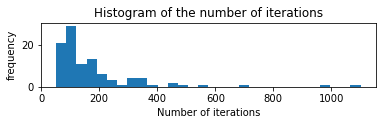

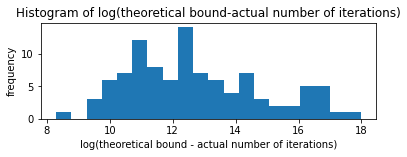

<Figure size 432x432 with 0 Axes>

In [5]:
plt.subplot(3,1,1)
plt.hist(num_iters,bins=30)
plt.title('Histogram of the number of iterations')
plt.xlabel('Number of iterations') 
plt.ylabel('frequency')
plt.figure(figsize=(6,6))

plt.subplot(3,1,2)
plt.hist(np.log(bounds_minus_ni),bins=20)
plt.title('Histogram of log(theoretical bound-actual number of iterations)')
plt.xlabel("log(theoretical bound - actual number of iterations)")
plt.ylabel("frequency")
plt.figure(figsize=(6,6))

plt.tight_layout()
plt.show()